In [85]:
import numpy as np
import pylab as plt
import pandas as pd
from tqdm import tqdm
from typing import List
from collections import Counter

# Statistical Packages
from scipy.stats import shapiro, gaussian_kde
from statsmodels.graphics.gofplots import qqplot

In [96]:
corpus = np.loadtxt('answers.txt', dtype=str)
guesses = np.loadtxt('accepted.txt', dtype=str)
guesses = np.array(list(guesses) + list(corpus))

In [118]:
def assign_score(guess: str, corpus: List[str]) -> List[List[int]]:
    """
    Score the Wordle guess against the true answer
    """
    scores = []

    for word in corpus:
        score = [0, 0, 0, 0, 0]

        counts = Counter(word)

        for i, char in enumerate(guess):
            if char == word[i]:
                score[i] += 2
                counts[char] -= 1

        for i, char in enumerate(guess): 
            if char in word and counts[char] > 0:
                score[i] += 1
                counts[char] -= 1


        scores.append(score)

    return scores

In [172]:
class Player:
    """
    """
    def __init__(self, guesses, corpus):
        """
        """
        self.guesses = guesses
        self.corpus = corpus
        self.scores, self.entropy = score_guesses(self.corpus)
        self.best_guess = self.guesses[np.argmax(entropies)]
    
    def calculate_entropy(self, scores: List[float]) -> float:
        """
        Calculate the entropy of a given word 
        """
        bins, counts = np.unique(scores, return_counts=True)
        prob = counts / self.corpus.shape[0]
        return -np.sum(prob * np.log2(prob))
    
    def score_guesses(self, corpus):
        """
        """
        entropies = []
        scores = []
        for guess in tqdm(self.guesses):
            score = np.sum(assign_score(guess, corpus), axis=1, dtype=int)
            entropies.append(self.calculate_entropy(score))
            scores.append(score)
            
        return scores, entropies
    
    def make_guess(self):
        """
        """
        pass
            
    

class WordleGame:
    """
    """
    def __init__(self, corpus, n_games=1):
        """
        """
        self.corpus = corpus
        self.true_words = np.random.choice(corpus, replace=False, size=min(n_games, corpus.shape[0]))
        self.guesses = {true_word: [] for true_word in self.true_words}
        
    def play_games(self, player):
        """
        """
        guess = ''
        self.guesses = {true_word: [] for true_word in self.true_words}
        
        for key in self.guesses.keys():
            available_words = player.guesses
            while guess != key:
                if len(self.guesses[key]) == 0:
                    guess = player.best_guess
                    score = assign_score(guess, [key])[0]
                    available_words = self.filter_words(guess, score, available_words)
                    self.guesses[key].append(guess)
                    
                else:
                    guess = player.make_guess(available_words)
                    score = assign_score(guess, [key])[0]
                    available_words = self.filter_words(guess, score, available_words)
                    self.guesses[key].append(guess)
                    
    def filter_words(self, guess, score, available_words) -> List[str]:
        """
        """
        new_list = []
        for word in available_words:
            counts = Counter(word)
            
            for i, char in enumerate(guess):
                if char == word[i]:
                    
                    counts[char] -= 1

            for i, char in enumerate(guess): 
                if char in word and counts[char] > 0:
                    
                    counts[char] -= 1

In [158]:
player = Player(guesses, corpus)

In [159]:
scores, entropies = player.score_guesses(corpus)

100%|██████████| 12972/12972 [01:50<00:00, 117.77it/s]


In [163]:
scores = np.array(scores)

In [164]:
scores

array([[ 3,  4,  4, ...,  2,  1,  1],
       [ 3,  3,  3, ...,  1,  0,  2],
       [ 3,  3,  3, ...,  2,  0,  1],
       ...,
       [ 2,  3,  3, ..., 10,  4,  3],
       [ 0,  2,  3, ...,  4, 10,  2],
       [ 1,  1,  1, ...,  3,  2, 10]])

In [168]:
wordle = WordleGame(corpus, n_games=100)

In [169]:
wordle.assign_score('shart')

AttributeError: 'WordleGame' object has no attribute 'assign_score'

In [66]:
entropy = []
score_matrix = []
categories = 10


for word in tqdm(guesses):
    entropy.append(assign_score(word, text))

100%|██████████| 12972/12972 [01:31<00:00, 142.26it/s]


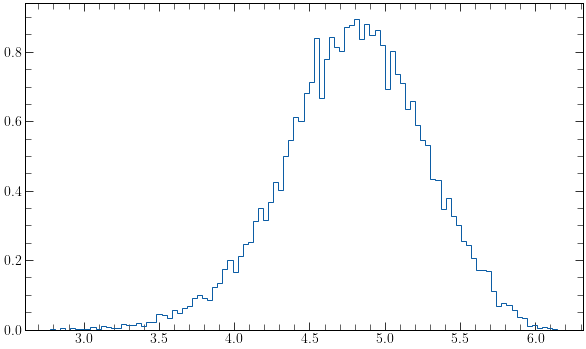

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(2 ** np.array(entropy), bins=100, histtype='step', density=True)
plt.show()

This is the word that maximizes your potential first score. We don't care what our first score is, we're most interested in solving the puzzle in the fewest number of attempts. If we really want to solve Wordle, we need to find words that most evenly the data between some midpoint score.

## Maximizing Entropy

A naive approach to solving Wordle is selecting a word that.

In [140]:
p = np.linspace(0, 1, 500)
H = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

<ipython-input-140-0d746b8c9873>:2: RuntimeWarning: divide by zero encountered in log2
  H = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
<ipython-input-140-0d746b8c9873>:2: RuntimeWarning: invalid value encountered in multiply
  H = -p * np.log2(p) - (1 - p) * np.log2(1 - p)


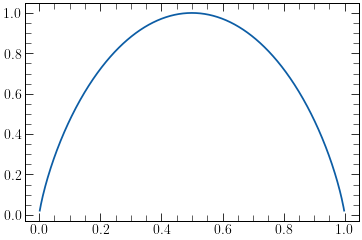

In [141]:
plt.plot(p, H)